In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [3]:
titanic = sns.load_dataset("titanic")

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='alive', ylabel='count'>

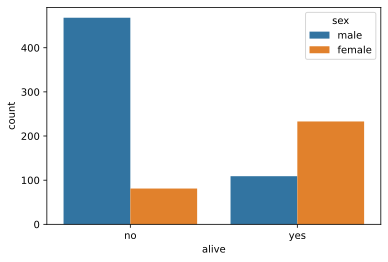

In [5]:
sns.countplot(x = "alive", hue = "sex", data = titanic)

<AxesSubplot:xlabel='class', ylabel='count'>

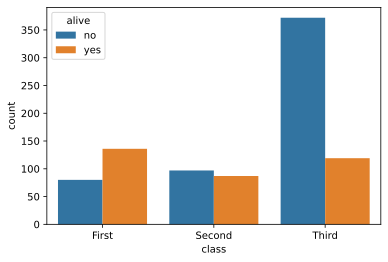

In [6]:
sns.countplot(x = "class", hue = "alive", data = titanic)

<AxesSubplot:xlabel='alive', ylabel='count'>

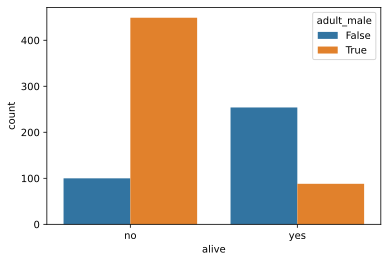

In [7]:
sns.countplot(x = "alive", hue = "adult_male", data = titanic)

<AxesSubplot:xlabel='deck', ylabel='count'>

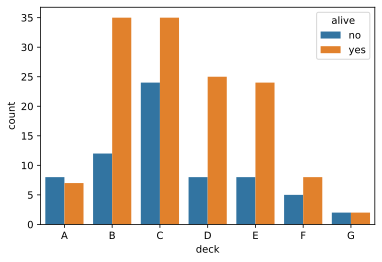

In [8]:
sns.countplot(x = "deck", hue = "alive", data = titanic)

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [10]:
titanic = sns.load_dataset("titanic")
titanic = titanic.drop("deck", axis = 1)
titanic["age"] = titanic["age"].fillna(titanic["age"].mean())
titanic = titanic.dropna()

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 86.1+ KB


In [12]:
X = titanic[["age", "fare"]]
y = titanic[["survived"]]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [47]:
DTmodel = DecisionTreeClassifier()

In [15]:
DTmodel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=20, random_state=234)

[Text(516.15, 499.4325, 'fare <= 50.74\ngini = 0.47\nsamples = 711\nvalue = [443, 268]\nclass = Died'),
 Text(258.075, 356.73749999999995, 'fare <= 10.481\ngini = 0.426\nsamples = 584\nvalue = [404, 180]\nclass = Died'),
 Text(129.0375, 214.04250000000002, 'age <= 16.5\ngini = 0.311\nsamples = 275\nvalue = [222, 53]\nclass = Died'),
 Text(64.51875, 71.34749999999997, 'gini = 0.486\nsamples = 12\nvalue = [5, 7]\nclass = Survived'),
 Text(193.55624999999998, 71.34749999999997, 'gini = 0.289\nsamples = 263\nvalue = [217, 46]\nclass = Died'),
 Text(387.11249999999995, 214.04250000000002, 'age <= 5.5\ngini = 0.484\nsamples = 309\nvalue = [182, 127]\nclass = Died'),
 Text(322.59375, 71.34749999999997, 'gini = 0.397\nsamples = 33\nvalue = [9, 24]\nclass = Survived'),
 Text(451.63124999999997, 71.34749999999997, 'gini = 0.468\nsamples = 276\nvalue = [173, 103]\nclass = Died'),
 Text(774.2249999999999, 356.73749999999995, 'fare <= 77.623\ngini = 0.426\nsamples = 127\nvalue = [39, 88]\nclass = S

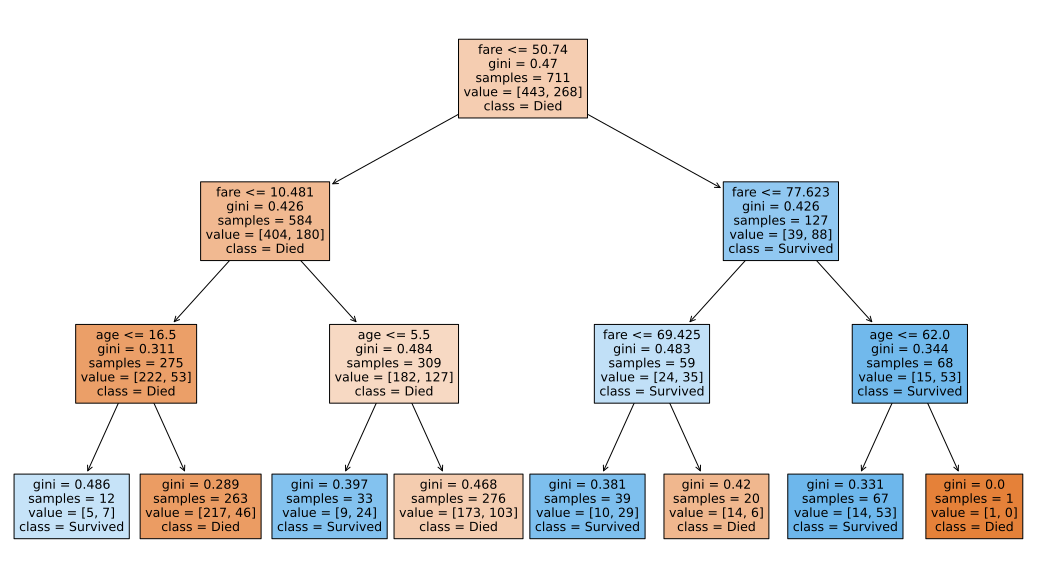

In [17]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)
plot_tree(DTmodel, feature_names = X.columns, impurity = True,
          class_names = ["Died", "Survived"], filled = True)

In [18]:
y_test

,survived
173,0
525,0
453,1
171,0
883,0
...,...
867,0
389,1
339,0
765,1


In [19]:
y_predDTmodel = DTmodel.predict(X_test)

In [20]:
y_predDTmodel

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0])

In [21]:
metrics.accuracy_score(y_test, y_predDTmodel)

0.6348314606741573

In [23]:
conf = metrics.confusion_matrix(y_test, y_predDTmodel)

Text(33.0, 0.5, 'Actual')

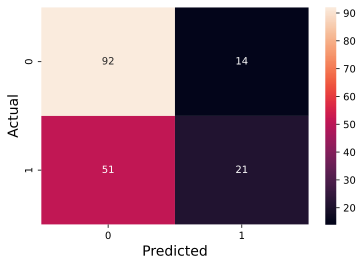

In [26]:
sns.heatmap(conf, annot = True)
plt.xlabel("Predicted", fontsize = 14)
plt.ylabel("Actual", fontsize = 14)

In [27]:
LGmodel = LogisticRegression(random_state = 234)

In [31]:
import numpy as np
LGmodel.fit(X_train, np.ravel(y_train))

LogisticRegression(random_state=234)

In [32]:
y_predLGmodel = LGmodel.predict(X_test)

In [33]:
metrics.accuracy_score(y_test, y_predLGmodel)

0.6235955056179775

In [34]:
RFmodel = RandomForestClassifier(random_state = 234)

In [38]:
RFmodel.fit(X_train, np.ravel(y_train))

RandomForestClassifier(random_state=234)

In [39]:
y_predRFmodel = RFmodel.predict(X_test)

In [41]:
metrics.accuracy_score(y_test, y_predRFmodel)

0.6292134831460674